# UANL - FACULTAD DE CIENCIAS FÍSICO MATEMÁTICAS


## Mineria de Datos

#### Michelle Díaz Gutiérrez 1849417 Grupo: 001

## Precios de acción de Microsoft

#### Introducción: Decidí elaborar un analisis sobre el precio de las acciones de Microsoft ya que este tipo de resgistros son 'sencillos' de conseguir, por así decirlo, el csv que se ve en el repositorio (Mineria-de-datos) es un registro que se descargo directamente de la página de yahoo-finanzas como CSV, son los precios de la acción de Microsoft en el periodo de abril 2020 - abril 2021. El analisis para este tipo de registros nos da una ligera introducción a lo que son los principios de analisis tecnico de un activo en materia de portafolios de inversión, una rama muy recurrida en el campo de las Ciencias Actuariales.

### Librerias utilizadas:

In [41]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# DATA ACQUISITION


In [42]:
df = pd.read_csv("C:\\Users\\MIKID\\Documents\\MSFT.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-01,153.000000,157.750000,150.820007,152.110001,150.579803,57969900
1,2020-04-02,151.860001,155.479996,150.360001,155.259995,153.698120,49630700
2,2020-04-03,155.100006,157.380005,152.190002,153.830002,152.282501,41243300
3,2020-04-06,160.320007,166.500000,157.580002,165.270004,163.607422,67111700
4,2020-04-07,169.589996,170.000000,163.259995,163.490005,161.845322,62769000
...,...,...,...,...,...,...,...
248,2021-03-26,231.550003,236.710007,231.550003,236.479996,236.479996,25471700
249,2021-03-29,236.589996,236.800003,231.880005,235.240005,235.240005,25227500
250,2021-03-30,233.529999,233.850006,231.100006,231.850006,231.850006,24792000
251,2021-03-31,232.910004,239.100006,232.389999,235.770004,235.770004,43564500


# DATA CLEANING

In [43]:

#El dataFrame original esta lleno
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


El data Frame esta lleno


In [44]:
df1=df.drop(columns=['High','Low','Close','Volume'])
df1

,Date,Open,Adj Close
0,2020-04-01,153.000000,150.579803
1,2020-04-02,151.860001,153.698120
2,2020-04-03,155.100006,152.282501
3,2020-04-06,160.320007,163.607422
4,2020-04-07,169.589996,161.845322
...,...,...,...
248,2021-03-26,231.550003,236.479996
249,2021-03-29,236.589996,235.240005
250,2021-03-30,233.529999,231.850006
251,2021-03-31,232.910004,235.770004


# DATA PARSING

In [45]:
df1.shape

(253, 3)

In [46]:
df1.columns


Index(['Date', 'Open', 'Adj Close'], dtype='object')

In [47]:
df1.dtypes


Date          object
Open         float64
Adj Close    float64
dtype: object

# DESCRIPTIVE STATISCS 

In [48]:
df1.describe()

,Open,Adj Close
count,253.000000,253.000000
mean,209.535652,208.641560
std,20.097125,20.539845
min,151.860001,150.579803
25%,200.050003,199.829971
50%,212.339996,211.384949
75%,222.690002,221.908905
max,245.029999,244.427048


# DATA VISUALIZATION

### Grafico de lineas

<AxesSubplot:>

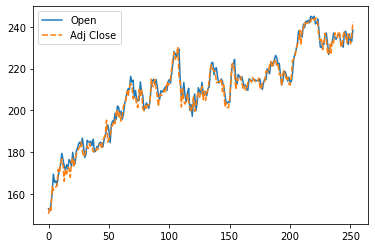

In [49]:
sns.lineplot(data=df1)

### Gráfico de dispersión

<AxesSubplot:xlabel='Open', ylabel='Adj Close'>

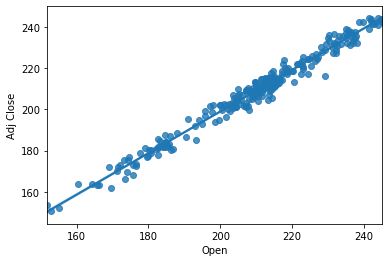

In [50]:
sns.regplot(x=df1['Open'],y=df1['Adj Close'])

# STATISTIC TEST


### Anova Test 


In [31]:
import scipy.stats as stats

In [32]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df1['Open'], df1['Adj Close'])
print(fvalue, pvalue)

0.24491811274365569 0.6208920104533517


In [33]:
# get ANOVA table as R like output
import statsmodels.api as sm